In [4]:
import pandas as pd
base = pd.read_csv('house-prices.csv')

In [8]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
x = base.iloc[:, 5].values
x = x.reshape(-1, 1)
x.shape

(21613, 1)

In [27]:
y = base.iloc[:, 2:3].values
y.shape

(21613, 1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(x)
Y = scaler_y.fit_transform(y)


C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vitor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


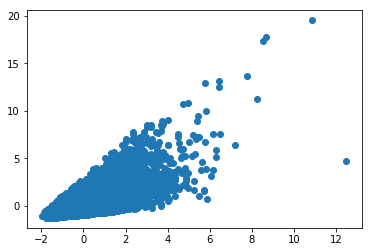

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, Y)

# Formula da regressao linear simples
y = b0 + b1 * x

In [42]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [44]:
import tensorflow as tf

In [46]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [47]:
batch_size = 32
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [48]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


In [51]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        indices = np.random.randint(len(x), size=batch_size)
        feed = {xph: X[indices], yph:Y[indices]}
        sess.run(treinamento, feed_dict=feed)
    b0_final, b1_final = sess.run([b0, b1])        

In [52]:
b0_final

-0.0030732837

In [53]:
b1_final

0.69893813

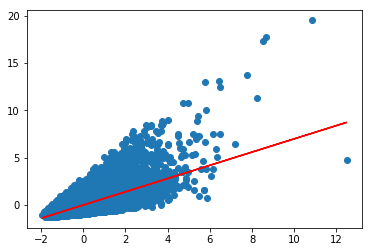

In [58]:
previsoes = b0_final + b1_final * X
plt.plot(X, Y, 'o')
plt.plot(X, previsoes, color='red')

In [63]:
y1 = scaler_y.inverse_transform(Y)
previsoes1 = scaler_y.inverse_transform(previsoes)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1, previsoes1)
mae

173392.882080725